<a href="https://colab.research.google.com/github/jyPark1105/ML_DL_Study_Myself/blob/main/Chap%204-2_Stochastic%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4-2 : Stochastic Gradient Descent

### Introduction

        *경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배우기
        
        **럭키백 이벤트의 폭발적 인기로 인한 다른 수산물 센터의 데이터 공급이 활발해짐 -> 샘플을 골라내기 힘들어진 상태
          게다가 추가되는 수산물은 아직 샘플을 가지고 있지도 않음
          어느 생선 데이터가 먼저 추가될 지와 모든 생선이 도착할 때까지 마냥 기다릴 수는 없는 상황


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ML_DL_Alone')

%load_ext autoreload
%autoreload 2

### 점진적인 학습

    1. 훈련 데이터가 한 번에 전달되는 것이 아니라 조금씩 전달된다는 것
       데이터가 쌓일 때까지 무작정 기다릴 수도 없는 상황

       -> 기존의 훈련 데이터 + "새로운 데이터 추가" -> 모델을 다시 훈련하는 방법
          그러나 이 방법은 모델을 훈련하기 위해 서버를 계속 늘려야하므로 지속 가능한 방법 x

    2. 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 것
       
       -> 하지만 데이터를 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함되어 있을 경우 치명적
          앞으로 모델이 정확한 예측을 하지 못할 것
    
    3. 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법

       -> 훈련에 사용한 데이터를 모두 유지할 필요 x, 앞서 학습한 데이터들을 까먹을 일이 없음

    
    **이러한 훈련 방식: 점진적 학습 or 온라인 학습

    대표적인 점진적 학습 알고리즘 -> 확률적 경사 하강법, Stochastic Gradient Descent
       

#### 확률적 경사 하강법(Stochastic Gradient Descent)

기술적 표현
1. 확률적: 랜덤하게, 무작위하게
2. 경사: 가파른 정도, 기울기
3. 하강법: 내려가는 방법

        산에서 내려오는 상황, 집으로 돌아가기 위해 등산로 입구까지 내려가야 함
        그러나 실제로 산에서 내려올 때는 천천히 조금씩 내려가야 함
        가장 가파른 길을 찾아 내려오지만 천천히 조금씩 내려오는 것이 중요

        목표: 가장 가파른 경사를 따라 원하는 지점에 도달하는 것

        -> 이것이 "경사 하강법"
___________________________________________________________
**A. 확률적 경사 하강법**: 전체 샘플을 사용하지 않고 **하나의 샘플을 훈련 세트에서 랜덤하게** 골라 가장 가파른 길을 찾는 방법

1. 훈련 세트에서 임의의 한 샘플을 선택하여 경사를 조금 내려간다.
2. 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다.
3. 전체 샘플을 모두 사용할 때까지 계속한다.
___________________________________________________________
**B. 에포크(Epoch)**: 확률적 경사 하강법에서 **훈련 세트를 한 번 모두 사용하는 과정**

일반적으로 경사 하강법은 수십, 수백 번 이상 epoch를 수행
___________________________________________________________
**C. 미니배치 경사 하강법**: **여러 개의 샘플을 사용**해 경사 하강법을 수행하는 방식

1. 무작위로 샘플을 선택해 산에서 내려가는 방식 -> 너무 무책임함
2. 돌이킬 수 없는 길로 들어설 수 있기 때문에, 아주 조금씩 내려가야함

무작위로 여러 개의 샘플을 선택하여 경사를 따라 내려가는 방법 -> "미니배치 경사 하강법"
___________________________________________________________
**D. 배치 경사 하강법**: **전체 샘플을 사용**해 경사 하강법을 수행하는 방식

1. 전체 데이터를 사용하기 때문에 가장 안정적인 방법
2. 그만큼 컴퓨터 자원 소모량 多
3. 엄청난 데이터량으로 인해 전체 데이터를 모두 읽을 수 없는 경우도 존재


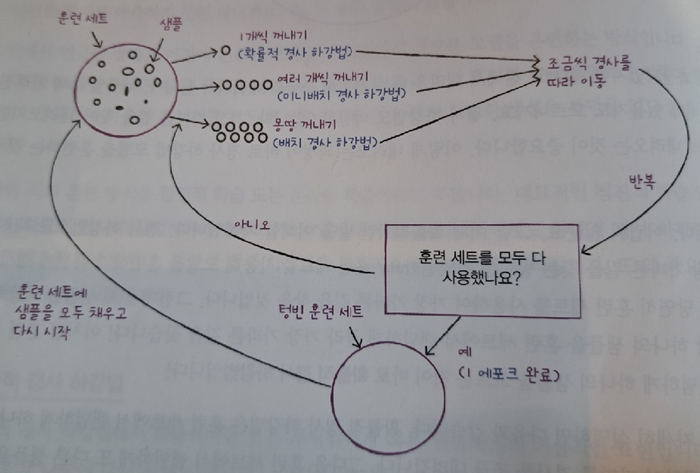

**확률적 경사 하강법**

1. 훈련 세트를 사용하여 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘
2. 훈련 세트가 모두 준비되어 있지 않고 매일매일 업데이트 되더라도 학습을 계속 진행할 수 있음 -> 산꼭대기에서부터 시작할 필요가 없음

    -> 가장 빠른 길을 찾아 내려가려고 하는 산은 무엇인가? 이것이 바로 **"손실 함수"**

####**Loss Function**
어떤 문제에 대해 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준

손실 함수에 대해,

1. 값이 작을수록 좋음(하지만 최솟값의 여부는 파악 불가)
2. 가능한 많이 찾아보고 만족할만한 수준의 손실값이라면 산을 다 내려왔다고 인정해야함
3. 이 값을 찾아 조금씩 이동하기 위해 **확률적 경사 하강법**을 사용

다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어있음


**Loss function & Cost function**
* 손실 함수: 훈련 세트의 샘플 하나에 대한 손실을 정의
* 비용 함수: 훈련 세트의 샘플 전체에 대한 손실의 합

비용 함수는 손실 함수의 다른 말으로, 둘은 섞어서 사용
______________________________________________________
정확도는 이산적이지 않고 연속적이여야 함

즉, **산의 경사면(손실 함수)은 확실히 연속적이고, 미분 가능**해야 함

그렇다면 **어떻게 연속적인 손실 함수를 만들 수 있는가? -> "로지스틱 회귀"**

####로지스틱 손실 함수
**확률: 0 ~ 1 사이의 연속적인 값**(Continuous Value)
____________________________________________________
샘플 n개에 대해 각각 0 ~ 1 사이의 예측 확률 값을 구하기
1. 샘플의 **i번째 손실 함수를 정의**(i = 1 ~ n)
2. **샘플의 타깃 = 1(양성 클래스)**일 때, 예측과 타깃을 곱한 후 음수 취하기

    예측(양성 예측) = 0.9, 타깃 = 1 -> 손실 함수 = (0.9 * 1) * (-1) = -0.9

3. **샘플의 타깃 = 0(음성 클래스)**일 때, (1 - 음성 클래스에 대한 예측) 확률값으로 계산.

    예측(음성 예측) = 0.2, 타깃 = 0일 때, 손실 함수 = ((1 - 0.2) * 1) * (-1) = -0.8
____________________________________________________
정확도 = 0.0 ~ 1.0

->

손실 함수 = -1.0 ~ 0.0
____________________________________________________
**예측 확률에 로그 함수를 적용**
* 예측 확률의 범위: 0 ~ 1 사이 -> 로그화하면 이 사이에서 음수가 되므로 최종 손실값은 양수(손실이 양수가 되면 이해하기 더 쉬움)
* 로그 함수 -> 0에 가까울수록 아주 큰 음수가 되므로 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있음

#### Binary Cross-Entropy Loss Function(BCE)
**이진 분류에서 사용되는 손실 함수: 로지스틱 손실 함수**

1. 양성 클래스(타깃 = 1) -> Loss = -log(prediction)

    예측 확률이 1에서 멀어져 0에 가까워질수록, Loss -> 아주 큰 양수가 됨

2. 음성 클래스(타깃 = 0) -> Loss = -log(1 - prediction)

    예측 확률이 0에서 멀어져 1에 가까워질수록, Loss -> 아주 큰 양수가 됨

참고) 다중 분류에서 사용되는 손실 함수: Cross-Entropy Loss Function

**회귀에서 사용하는 손실 함수?**

1. 평균 절댓값 오차(mean absolute error) -> 전체 샘플에 대해 |타깃 - 예측| 구하고 평균화
2. 평균 제곱 오차(mean squared error) -> 전체 샘플에 대해 (타깃 - 예측)^2 구하고 평균화
**값이 작을수록 좋은 모델**

####**중간 정리**

1. 이미 정의된 손실 함수가 있으므로 그것을 상황에 맞게 적절하게 사용할 것(머신러닝 라이브러리)
2. 그러나 손실 함수가 무엇인지, 왜 정의를 해야 하는지 정확히 이해할 것

###SGDClassifier

In [ ]:
# pandas dataframe 사용하여 데이터 담기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# Species 열: Target
# 나머지 열: Input
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 훈련 세트에서 학습한 통계값을 통해 Train set & Test set를 변환할 것
ss.fit(train_input)

# 데이터 스케일링
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

현재 상황 및 준비
1. 특성값의 스케일을 맞춘 두 넘파이 배열 train_scaled, test_scaled를 준비
2. 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 'SGDClassifier'를 import하기

 **a. SGDClassifier 클래스의 객체를 만들 때 2개의 매개변수를 지정(loss 매개변수, max_iter 매개변수)**

 **b. loss='log_loss' -> 로지스틱 손실 함수**

 **c. max_iter=10 -> 수행할 에포크 횟수를 10으로 지정**

3. 그 다음 훈련 점수와 테스트 점수를 출력


    참고) 다중 분류의 경우 SGDClassifier 클래스의 객체를 생성할 때 loss='log_loss'로 지정하면 클래스마다 이진 분류 모델을 생성함
    즉, 도미 = 양성 클래스로 두고 나머지를 모두 음성 클래스로 두는 방식 -> One versus Rest(OvR)

In [ ]:
# 확률적 경사 하강법 클래스 임포트
from sklearn.linear_model import SGDClassifier

# 객체 생성 시 매개변수 2개(물론 시드는 동일하게)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

# 입력 데이터를 전달하여 모델 훈련
sc.fit(train_scaled, train_target)

# 훈련 점수와 테스트 점수를 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

ConvergenceWarning 경고
    
    /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit. warnings.warn(

    Scikit-learn에서 친절하게도 모델이 충분히 수렴하지 않았다는 ConvergenceWarning 경고를 보냄(오류가 아닌 경고)
    -> "max_iter 매개변수의 값을 충분히 늘리기"

확률적 경사 하강법 -> **점진적 학습 가능**

1. SGDClassifier 객체를 다시 만들지 않고 **훈련한 모델 sc를 추가로 더 훈련**
2. **모델을 이어서 훈련하기 위해 partial_fit() 메서드를 사용**

    fit() 메서드와 사용법이 동일하지만 **호출할 때마다 1 epoch씩 이어서 훈련 가능**

In [ ]:
# 훈련 모델 sc를 추가로 1 epoch만큼 훈련, 동일한 데이터로
sc.partial_fit(train_scaled, train_target)

# 다시 훈련 점수와 테스트 점수를 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

무작정 많이 반복하여 훈련할 수는 없기에 기준이 명확히 필요

    훈련 데이터인 train_scaled, train_target 배열들을 모두 사용하였으므로 배치 경사 하강법이 아닌가?

    -> 아니다. SGDClassifier 객체에 훈련 세트 전체를 전달하였지만, 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행함
       게다가 SGDClassifier는 Mini-batch GD 및 Batch GD를 지원하지 않는 클래스

### Epoch & Overfitting/Underfitting

* 확률적 경사 하강법: 에포크 횟수에 따라 과대적합 및 과소적합 문제가 종종 일어남

    1. Epoch ↓(너무 적음) : 모델이 훈련 세트를 덜 학습한 현상
     
     -> 마치 산을 다 내려오지 못 하고 훈련을 마치는 격(너무 적은 에포크 동안 훈련한 모델은 훈련 세트와 테스트 세트에 맞지 않음)

    2. Epoch ↑(충분히 적당함) : 훈련 세트를 완전히 학습하여 아주 잘 맞는 모델

    3. Epoch 多(너무 많음) : 훈련 세트에 너무 잘 맞아 테스트 세트에서 오히려 점수가 나쁜 과대적합된 모델


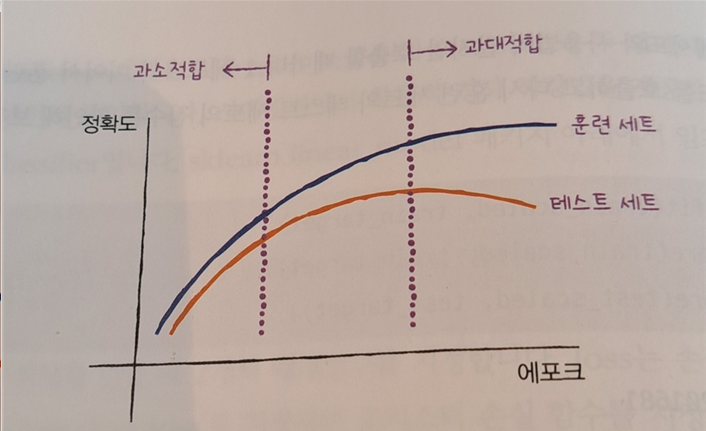

####Epoch가 증가함에 따라 모델의 정확도를 나타낸 graph
* 훈련 점수: Epoch 증가 시 꾸준히 증가
* 테스트 점수: Epoch 증가 시 어느 순간부터 감소(이 지점이 모델이 과대적합되기 시작하는 곳)

**조기 종료**(early stopping): 과대적합이 시작되기 전에 훈련을 멈추는 것
_____________________________________
예제) partial_fit() 메서드만 사용 -> 이 경우 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달할 것
* np.unique() 함수를 통해 train_target에 있는 7개 생선의 목록을 생성
* Epoch마다 훈련 점수와 테스트 점수를 기록하기 위해 2개의 리스트 준비

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

# 2개의 리스트 준비
train_score = []
test_score = []

# 전체 클래스의 레이블 담기
classes = np.unique(train_target)

    *300번의 epoch 동안 훈련을 반복하여 진행하기

    매 반복마다 훈련 점수와 테스트 점수를 계산하여 train_score, test_score 리스트에 추가

    python의 _는 특별한 변수: 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용

In [ ]:
# 모델 부분적 훈련 및 점수 추가
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    # 정확도 점수 추가
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [ ]:
# 300번의 epoch 동안 기록한 훈련 점수와 테스트 점수를 그래프로 그리기
import matplotlib.pyplot as plt

# 훈련 점수와 테스트 점수 그리기
plt.plot(train_score)
plt.plot(test_score)

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

그래프 해석
1. epoch 초기: 과소적합되어 훈련 점수 & 테스트 점수 모두 낮음
2. epoch 100 이후: 훈련 세트와 테스트 세트의 점수가 차이나기 시작 -> max_iter=100으로 지정

        실제로 epoch > 100인 순간부터 훈련 점수는 꾸준히 증가하지만 테스트 점수는 그대로임
    
        -> 이 때부터 과대적합이 시작
_______________________________________________________
아래 코드)
1. **SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 훈련을 자동으로 멈춤**
2. tol 매개변수 -> 향상될 최솟값 지정하는 매개변수(None으로 지정하여 100 epoch를 무조건 채우도록 설정)

    이로서 확률적 경사 하강법을 사용한 생선 분류 문제도 성공적으로 수행함

In [ ]:
# 객체 재생성 및 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

# 훈련 점수 및 테스트 점수 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

    SGDClassifier -> 확률적 경사 하강법을 사용한 분류 모델
    SGDRegressor -> 확률적 경사 하강법을 사용한 회귀 모델

SGDClassifier의 loss 매개변수
* 기본값 = 'hinge' -> **hinge loss = svm algorithm을 위한 loss function**
* SGDClassifier: 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘에 제공

In [ ]:
# hinge loss를 사용하여 100 epoch 동안 모델 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

### 문제 해결 과정
**점진적 학습을 위한 확률적 경사 하강법**

실시간으로 학습하기 위한 새로운 머신러닝 모델이 필요
-> 확률적 경사 하강법을 사용하여 점진적으로 학습하는 로지스틱 회귀 모델을 훈련
________________________________________________________
**Stochastic Gradient Descent**
* loss function 정의 -> 조금씩 경사를 따라 내려오기

* 충분히 반복 훈련하면 훈련 세트에서 좋은 점수를 출력

   -> epoch가 너무 증가하면 훈련 세트에서 과대적합, 일반화 성능 감소

* **발전하는 머신러닝과 인공지능의 세계에서 대량의 데이터를 한 번에 컴퓨터 메모리에 읽는 것이 불가능**

    -> **데이터를 조금씩 사용하여 점진적인 학습을 진행**

### 마무리

0. What we've learned
    * 회귀와 분류에 널리 사용되는 다양한 알고리즘을 학습(KNN, 선형 회귀, Ridge, Lasso, 로지스틱 회귀, SGD 등)
    * 실전에서 널리 사용되는 뛰어난 알고리즘이지만 최고 수준은 아님
    * 신경망 알고리즘을 제외하고 머신러닝에서 가장 뛰어난 성능을 내는 Decision Tree 알고리즘을 배워보기
    
1. Keywords
    * **Stochastic Gradient Descent** : 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사면을 따라 천천히 내려가며 최적의 모델을 찾는 알고리즘

     * 샘플을 하나씩 사용하지 않고 여러 개를 사용 -> Mini-batch Gradient Descent
     * 한 번에 전체 샘플을 사용하여 경사 하강법을 진행 -> Batch Gradient Descent

    * **Loss Function** : 확률적 경사 하강법 알고리즘이 최적화할 대상

     * 이진 분류: Logistic Regression(또는 Binary Cross-Entropy) Loss Function(BCE)
     * 다중 분류: Cross-Entropy Loss Function(CE)
     * 회귀 문제: Mean Squared Error Loss Function(MSE), 또는 Mean Absolute Error(MAE)

    * **Epoch** : 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미

        일반적으로 경사 하강법: 수십에서 수백 번의 에포크를 반복

2. 핵심 package와 function
    * **scikit-learn**
     * **SGDClassifier** : 확률적 경사 하강법을 사용한 분류 모델을 생성하도록 제공해주는 클래스
        * loss 매개변수: 기본값 = 'hinge'(SVM 알고리즘에서 사용되는 hinge loss)
        * penalty 매개변수: L2 규제(Ridge)와 L1 규제(Lasso)를 선택 가능, 기본값 = 'l2'

            -> 규제 강도는 alpha 매개변수를 통해 지정(기본값 = 0.0001)
        * max_iter 매개변수: epoch 횟수를 지정(기본값 = 1000)
        * tol 매개변수: 반복을 멈출 조건을 지정하는 매개변수(기본값 = 0.001)
         * n_iter_no_change 매개변수: 지정한 에포크 동안 tol 만큼 줄어들지 않으면 알고리즘을 중단하도록 하는 매개변수(기본값 = 5)
     * **SGDRegressor** : 확률적 경사 하강법을 사용한 회귀 모델을 생성하도록 제공해주는 클래스
        * loss 매개변수: 손실 함수를 지정하는 매개변수(기본값 = 'squared_loss')
        * SGDClassifier에서 설명한 매개변수들은 모두 SGDRegressor 클래스에서 동일하게 사용됨